# 逼近法

In [1]:
import numpy as np
from pylab import plt,mpl

In [2]:
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
def f(x):
    return np.sin(x) + 0.5 * x

In [25]:
#用列表传参大法
def create_plot(x,y,styles,labels,axlabels):
    plt.figure(figsize = (10,6))
    for i in range(len(x)):
        #注意传入的是x[i]是一个列表而不是一个数值
        plt.plot(x[i],y[i],styles[i],label = labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])

    plt.legend(loc = 0)

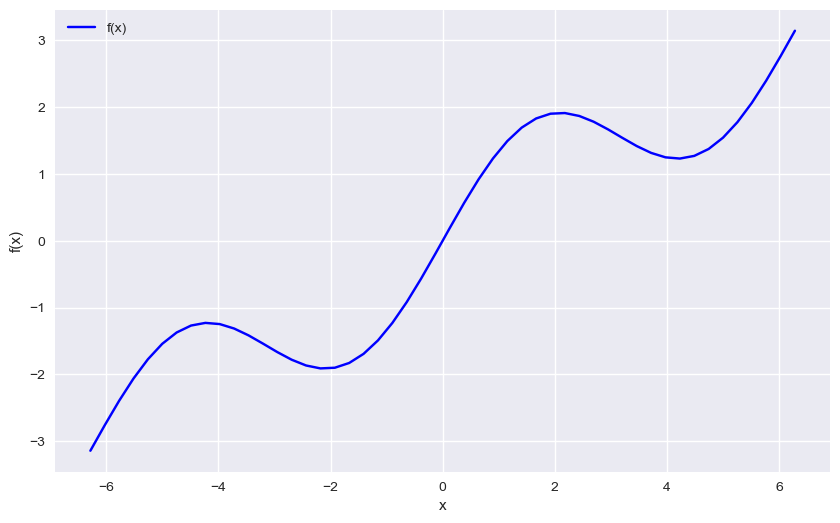

In [26]:
x = np.linspace(-2 * np.pi, 2 * np.pi,50)

create_plot([x],[f(x)],['b'],['f(x)'],['x','f(x)'])

## 回归

**回归的本质在于给定一组所谓的“基函数”，通过一个公式寻找最优参数**

### 单项式作为基函数 (np.polyfit、np.polyval)

In [28]:
res = np.polyfit(x,f(x),deg=1,full=True) #deg = 1 线性回归
#回归参数、残差、有效秩、奇异值和相对条件数。
res

(array([ 4.28841952e-01, -1.40254456e-16]),
 array([21.03238686]),
 2,
 array([1., 1.]),
 1.1102230246251565e-14)

In [29]:
ry = np.polyval(res[0],x)

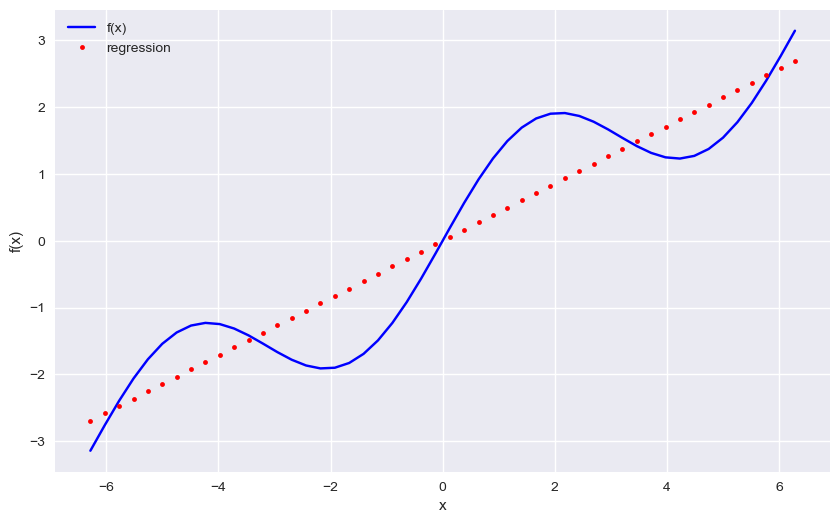

In [31]:
create_plot([x,x],[f(x),ry],['b','r.'],['f(x)','regression'],['x','f(x)'])

In [37]:
reg = np.polyfit(x,f(x),deg = 5)
ry = np.polyval(reg,x)

In [38]:
reg

array([ 1.37920761e-03, -2.46674444e-18, -6.82525072e-02,  2.67159585e-17,
        1.11425209e+00, -1.14260431e-16])

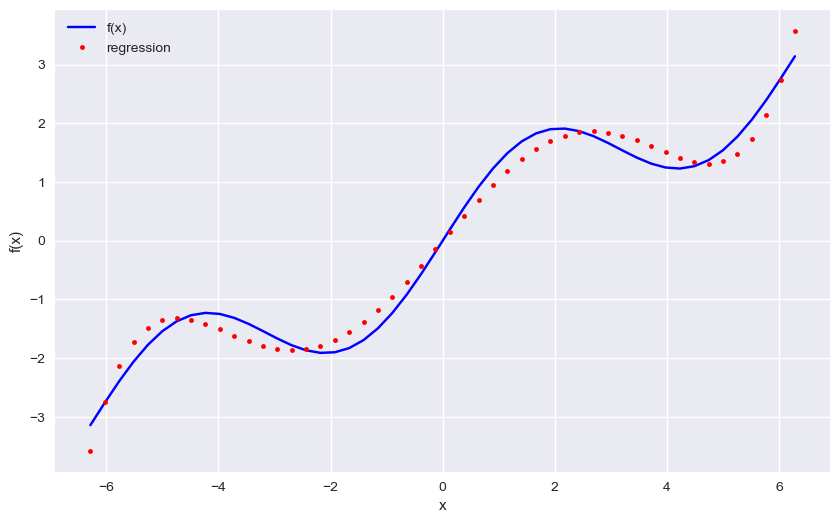

In [39]:
create_plot([x,x],[f(x),ry],['b','r.'],['f(x)','regression'],['x','f(x)'])

In [45]:
reg = np.polyfit(x,f(x),deg = 7)
ry = np.polyval(reg,x)

In [47]:
np.allclose(f(x),ry)  #检查函数和回归值是否相同

False

In [50]:
np.mean((f(x)-ry)**2)     #手动计算出MSE

0.0017769134759517593

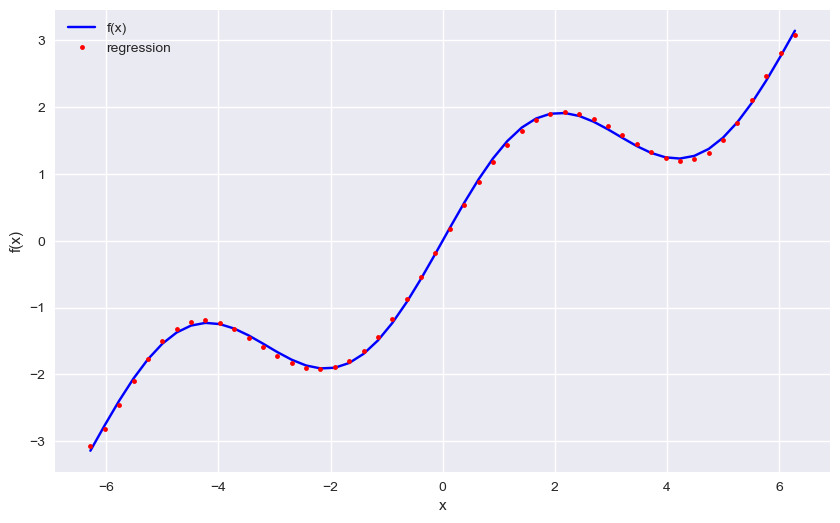

In [51]:
create_plot([x,x],[f(x),ry],['b','r.'],['f(x)','regression'],['x','f(x)'])

### 单独的基函数(自定义基函数)

In [53]:
matrix = np.zeros((3+1,len(x)))
#一共len(x)个样本观测值
matrix[3,:] = x**3
matrix[2,:] = x**2
matrix[1,:] = x
matrix[0,:] = 1

In [55]:
#是 NumPy 中用于执行最小二乘线性回归的函数调用。
#返回值函数返回一个元组 (coefficients, residuals, rank, singular_values)


reg = np.linalg.lstsq(matrix.T,f(x),rcond = None)[0]

In [56]:
reg.round(4)

array([ 0.    ,  0.5628, -0.    , -0.0054])

In [57]:
#矩阵乘法得到回归值
ry = np.dot(reg,matrix)

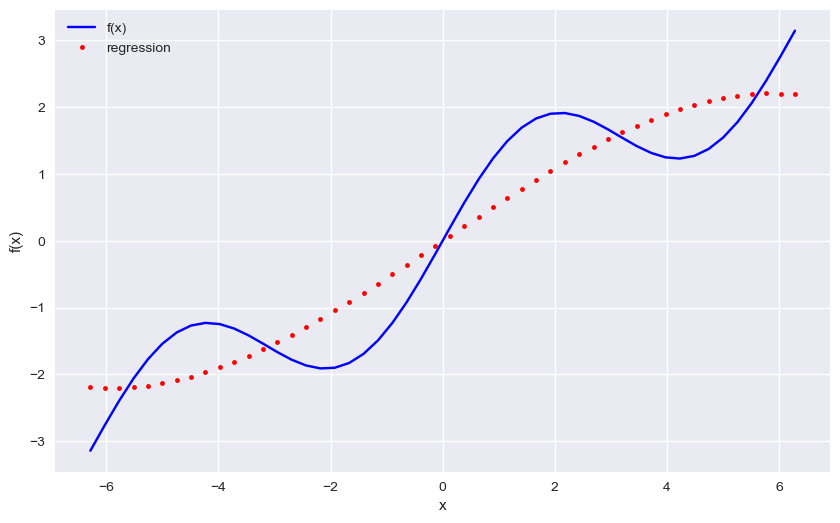

In [58]:
create_plot([x,x],[f(x),ry],['b','r.'],['f(x)','regression'],['x','f(x)'])

In [59]:
matrix[3:] = np.sin(x)
reg = np.linalg.lstsq(matrix.T,f(x),rcond = None)[0]

In [61]:
reg.round(4)

array([0. , 0.5, 0. , 1. ])

In [62]:
#矩阵乘法得到回归值
ry = np.dot(reg,matrix)

In [63]:
np.allclose(f(x),ry)

True

In [66]:
#再次手动求MSE
np.mean((f(x)-ry)**2)

3.345571424993955e-31

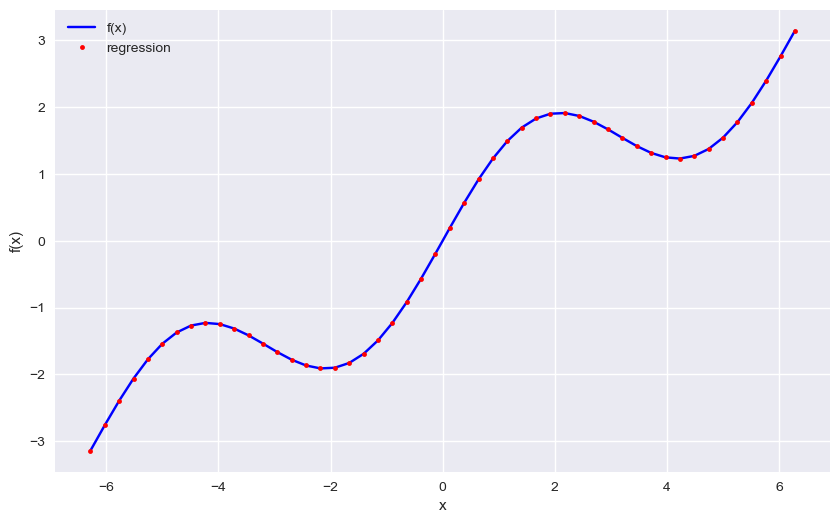

In [67]:
create_plot([x,x],[f(x),ry],['b','r.'],['f(x)','regression'],['x','f(x)'])

### 有噪声的数据

In [70]:
xn = np.linspace(-2*np.pi,2*np.pi,50)
#为举例，向数据中引入噪声
xn = xn + 0.15*np.random.standard_normal(len(xn))
#向y中引入噪声
yn = f(xn) + 0.25*np.random.standard_normal(len(xn))

In [71]:
reg = np.polyfit(xn,yn,7)
ry = np.polyval(reg,xn)

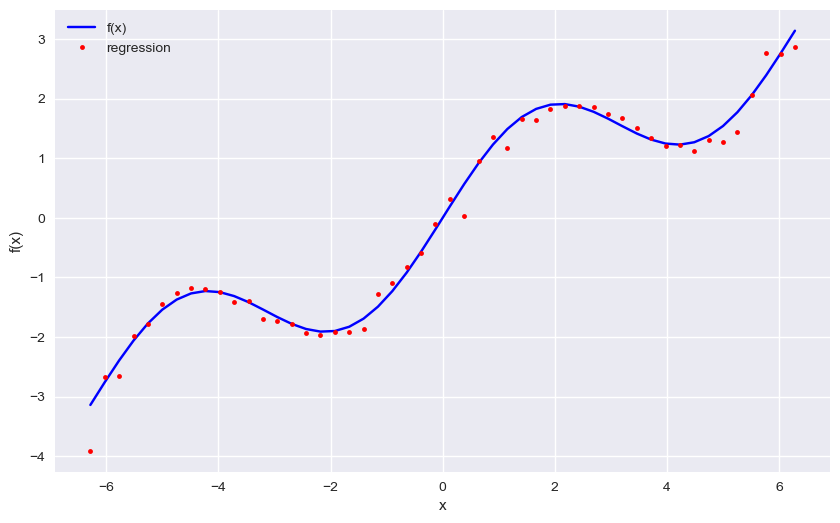

In [72]:
create_plot([x,x],[f(x),ry],['b','r.'],['f(x)','regression'],['x','f(x)'])

### 未排序数据(回归的一大特点:可以无缝地处理未排序数据)

In [73]:
xu = np.random.rand(50)*4*np.pi - 2*np.pi
yu = f(xu)

In [74]:
print(xu[:10].round(2))
print(yu[:10].round(2))

[ 2.93  0.27 -5.5  -0.46 -2.36 -5.17  0.94  3.53  1.89  4.34]
[ 1.68  0.4  -2.05 -0.67 -1.88 -1.68  1.28  1.39  1.89  1.24]


In [75]:
reg = np.polyfit(xu,yu,5)
ry = np.polyval(reg,xu)

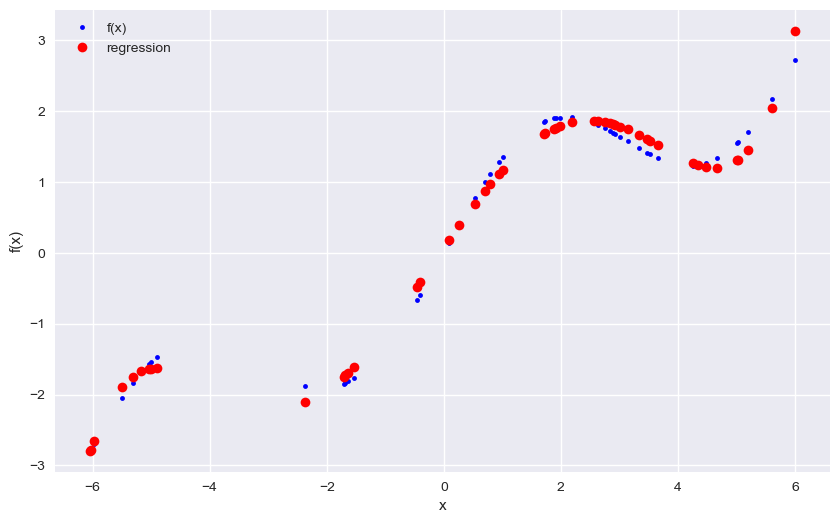

In [76]:
create_plot([xu,xu],[yu,ry],['b.','ro'],['f(x)','regression'],['x','f(x)'])

### 多维: 最小二乘法优点，可以较为简单用于多维

In [84]:
def fm(p):
    x,y = p
    return np.sin(x) + 0.25*x + np.sqrt(y) +0.05*y**2

In [85]:
x = np.linspace(0,10,20)
y = np.linspace(0,10,20)
X, Y =np.meshgrid(x,y)

In [86]:
Z = fm((X,Y))
#将网格结构数据转为一维
x = X.flatten()
y = Y.flatten()

In [87]:
from mpl_toolkits.mplot3d import Axes3D

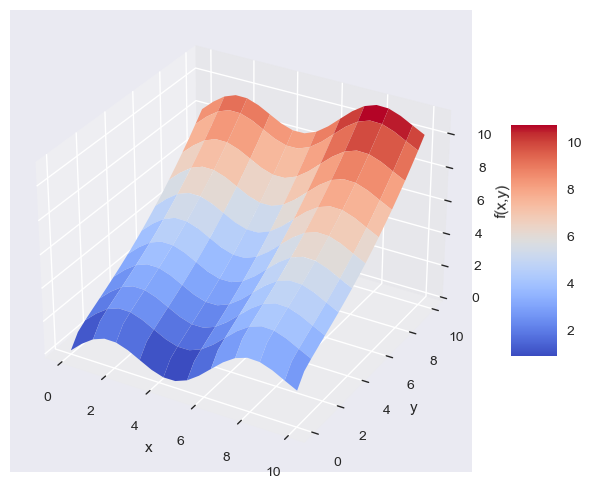

In [92]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X,Y,Z,rstride = 2, 
                       cstride = 2, cmap = 'coolwarm',
                       linewidth = 0.5,antialiased = True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf,shrink = 0.5,aspect = 5)

In [93]:
matrix = np.zeros((len(x),6+1))
matrix[:,6] = np.sqrt(y)
matrix[:,5] = np.sin(x)
matrix[:,4] = y**2
matrix[:,3] = x**2
matrix[:,2] = y
matrix[:,1] = x
matrix[:,0] = 1

In [94]:
reg = np.linalg.lstsq(matrix,fm((x,y)),rcond=None)[0]

In [95]:
RZ = np.dot(matrix,reg).reshape(20,20)

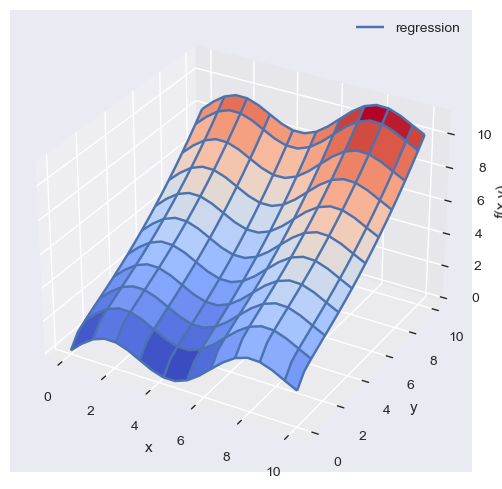

In [101]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111, projection='3d')
surf1 = ax.plot_surface(X,Y,Z,rstride = 2,cstride = 2,cmap = mpl.cm.coolwarm,
                       linewidth = 0.5,antialiased = True)
surf2 = ax.plot_wireframe(X,Y,RZ,rstride = 2,cstride = 2,label = 'regression')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.legend()
fig.colorbar(surf,shrink = 0.5,aspect = 5)